### 1. Importing dependancies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #this is the model we are using here (not deep diving) //derived from sigmoid
from sklearn.metrics import (
                                classification_report,
                                confusion_matrix,
                                roc_auc_score,
                                accuracy_score,
                                roc_curve,
                                precision_recall_curve,
                                f1_score,
                                precision_score,
                                recall_score
                                )

warnings.filterwarnings('ignore')

### 2. Quick Overview on Logistic Regression

Y_hat(Z) = 1 / (1 + exp(-Z))

P(Y = 1 | X) = Y_hat(Z)

In [2]:
seed = 42
np.random.seed(seed)

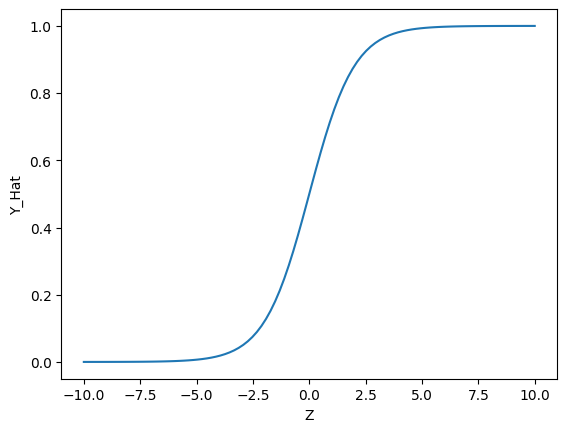

In [3]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_Hat')
plt.show()


### 3. Loading the Data

In [4]:
X_train = np.load('artifacts\X_train.npz') ['arr_0']
Y_train = np.load('artifacts\Y_train.npz')  ['arr_0']
X_test = np.load('artifacts\X_test.npz')  ['arr_0']
Y_test = np.load('artifacts\Y_test.npz')  ['arr_0']

### 4. Training the Model

In [5]:
model_lr = LogisticRegression(
                                random_state = 42, #random seed means that if you do random operations if you are not setting a state it will always produce different results
                                max_iter = 1000  #how many iterations //if increase training time might be bit high
                                )

model_lr.fit(X_train, Y_train) 

LogisticRegression(max_iter=1000, random_state=42)

### 6. Inference

In [6]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [7]:
Y_hat_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Alternative way (probabiloty values)

- if you want to get the probability, in sigmoid it always gives probability values.
- the logic is if the Y_hat probability more than 0.5 we consider it as '1' (churn), if its less than 0.5 its '0' (retain/non-churn)

In [8]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [9]:
Y_proba_train

array([[0.83191774, 0.16808226],
       [0.91485291, 0.08514709],
       [0.74754112, 0.25245888],
       ...,
       [0.46464907, 0.53535093],
       [0.36871924, 0.63128076],
       [0.70486062, 0.29513938]])

### 7. Evaluation

In [10]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [12]:
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

# these values are anyway bad, you cant actually tell the performance of the model by these. because we dont know how this will perform class wise.

accuracy: 0.6948474237118559
precision: 0.33884297520661155
recall: 0.6542553191489362
f1_score: 0.44646098003629764


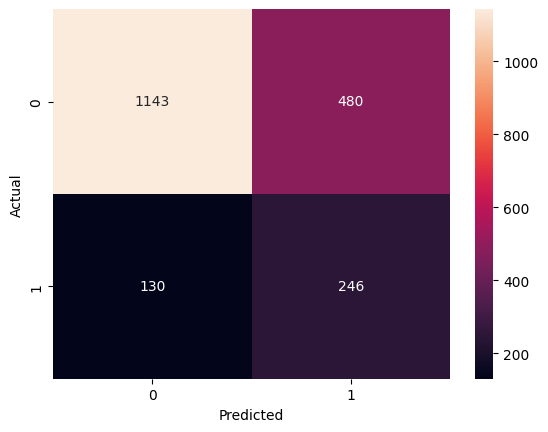

In [13]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

its like this:

1. when 'actual' value is '0', model predicted it as '0' would be = 1143 values (True Negative)
2. when 'actual' value is '0', model predicted it as '1' would be = 480 values (False Positive)
3. when 'actual' value is '1', model predicted it as '0' would be = 130 values (False Negative)
4. when 'actual' value is '1', model predicted it as '1' would be = 246 values (True Positive)